# Лабораторная работа №6
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.
# Выполнил студент группы БСТ2001 Кувшинов М.И.

### Задание
1. Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом.

2. Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса.

3. Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа. Данные представить в виде таблицы.

### Вариант 10 - Алгоритм Джонсона

In [12]:
!pip install networkx algorithmx matplotlib

Modified Graph: [[0, 0, 3, 3], [0, 0, 0, 0], [6, 0, 0, 0], [3, 0, 0, 0]]

Shortest Distance with vertex 0 as the source:

Vertex 0: 0
Vertex 1: 0
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 1 as the source:

Vertex 0: 0
Vertex 1: 0
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 2 as the source:

Vertex 0: 3
Vertex 1: 3
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 3 as the source:

Vertex 0: 3
Vertex 1: 3
Vertex 2: 3
Vertex 3: 0
0.0008291000001463544 sec.


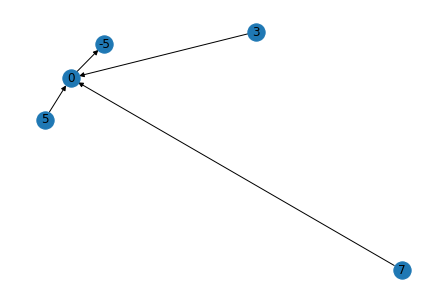

In [14]:
# Функция импорта для инициализации словаря
from collections import defaultdict
import networkx as nx
import algorithmx
import json
import timeit
import matplotlib.pyplot as plt
MAX_INT = float('Inf')
# Возвращает вершину с минимумом
# расстояние от источника
def minDistance(dist, visited):
    (minimum, minVertex) = (MAX_INT, 0)
    for vertex in range(len(dist)):
        if minimum > dist[vertex] and visited[vertex] == False:
            (minimum, minVertex) = (dist[vertex], vertex)
    return minVertex
# Dijkstra Алгоритм для модификации
# График (удаление отрицательных весов)
def Dijkstra(graph, modifiedGraph, src):
    # Количество вершин в графе
    num_vertices = len(graph)
    # Словарь, чтобы проверить, является ли данная вершина
    # уже включен в дерево кратчайшего пути
    sptSet = defaultdict(lambda: False)
    # Наименьшее расстояние всех вершин от источника
    dist = [MAX_INT] * num_vertices
    dist[src] = 0
    for count in range(num_vertices):
        # Текущая вершина, которая находится на минимальном расстоянии
        # из источника и еще не включены в
        # кратчайший путь
        curVertex = minDistance(dist, sptSet)
        sptSet[curVertex] = True
        for vertex in range(num_vertices):
            if ((sptSet[vertex] == False) and
                    (dist[vertex] > (dist[curVertex] +
                                     modifiedGraph[curVertex][vertex])) and
                    (graph[curVertex][vertex] != 0)):
                dist[vertex] = (dist[curVertex] +
                                modifiedGraph[curVertex][vertex]);
    # Распечатать кратчайшее расстояние от источника
    for vertex in range(num_vertices):
        print('Vertex ' + str(vertex) + ': ' + str(dist[vertex]))
# Функция для расчета кратчайшего расстояния от источника
# ко всем остальным вершинам, используя алгоритм Беллмана-Форда
def BellmanFord(edges, graph, num_vertices):
    # Добавить источник s и вычислить его минимум
    # расстояние от любого другого узла
    dist = [MAX_INT] * (num_vertices + 1)
    dist[num_vertices] = 0
    for i in range(num_vertices):
        edges.append([num_vertices, i, 0])
    for i in range(num_vertices):
        for (src, des, weight) in edges:
            if ((dist[src] != MAX_INT) and
                    (dist[src] + weight < dist[des])):
                dist[des] = dist[src] + weight
    # Не отправлять значение для добавленного источника
    return dist[0:num_vertices]
# Функция для реализации алгоритма Джонсона
def JohnsonAlgorithm(graph):
    edges = []
    # Создать список ребер для алгоритма Беллмана-Форда
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] != 0:
                edges.append([i, j, graph[i][j]])
    # Веса, используемые для изменения оригинальных весов
    modifyWeights = BellmanFord(edges, graph, len(graph))
    modifiedGraph = [[0 for x in range(len(graph))] for y in
                     range(len(graph))]
    # Изменить вес, чтобы избавиться от отрицательных весов
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] != 0:
                modifiedGraph[i][j] = (graph[i][j] +
                                       modifyWeights[i] - modifyWeights[j]);
    print('Modified Graph: ' + str(modifiedGraph))
    # Запустите Dijkstra для каждой вершины как источник один за другим
    for src in range(len(graph)):
        print('\nShortest Distance with vertex ' +
              str(src) + ' as the source:\n')
        Dijkstra(graph, modifiedGraph, src)
graph = [[0, -5, 2, 3], [5, 0, 4, 0], [7, 0, 0, 1], [3, 0, 0, 0]]
start = timeit.default_timer()
JohnsonAlgorithm(graph)
print(str((timeit.default_timer()-start)) +  " sec.")

# Создание графа
G = nx.DiGraph()
for row in graph:
    G.add_weighted_edges_from([(row[0], row[1], row[2])])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True)